In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import plotly.express as px
import math

#### beta=relation of a stock with nifty
#### purpose :- build a portfolio such that there is a fixed return regardless of the direction of the market

In [122]:
# Define stock symbols and time period "SUNDARMHLD.NS"
stocks = ["AARTIIND.NS", "ABFRL.NS", "ACC.NS", "ADANIENT.NS", "ADANIPORTS.NS", "ADANITRANS.NS", "ADVANIHOTR.NS", 
          "ADSL.NS", "AJANTPETRO.NS", "APOLLOHOSP.NS", "APOLLOTYRE.NS", "APOLLUVAS.NS", "ASHOKLEY.NS", "ASIANPAINT.NS", 
          "AUROPHARMA.NS", "AXISBANK.NS", "BAJAJHIND.NS", "BAJAJFINSV.NS", "BALKRISIND.NS", "BANDHANBNK.NS", "BANKBARODA.NS",
          "BANKINDIA.NS", "BATAINDIA.NS", "BEL.NS", "BHEL.NS", "BPCL.NS", "BRITANNIA.NS", "BSL.NS", "CADILAHC.NS", 
          "CENTURYTEX.NS", "CHOLAFIN.NS", "CIPLA.NS", "COALINDIA.NS", "CONCOR.NS", "CROMPTON.NS", "CUB.NS", "DABUR.NS",
          "DEEPAKFERT.NS", "DIVISLAB.NS", "DLF.NS", "DRREDDY.NS", "EICHERMOT.NS", "EIDMKTG.NS", "ENGINERSIN.NS", "ESCORTS.NS", 
          "EXIDEIND.NS", "FEDERALBNK.NS", "FINOSERV.NS", "GAIL.NS", "GLANDPHARMA.NS", "GODREJCP.NS", "GODREJPROP.NS", 
          "GRASIM.NS", "HDFC.NS", "HDFCBANK.NS", "HEROMOTOCO.NS", "HINDALCO.NS", "HINDUNILVR.NS", "HDFCLIFE.NS", 
          "HDFCAMC.NS", "HCLTECH.NS", "ICICIGI.NS", "ICICIBANK.NS", "ICICINFRA.NS", "IDFCFIRSTB.NS", "INDUSINDBK.NS", 
          "INFY.NS", "IOC.NS", "ITC.NS", "JINDALSTEL.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "L&TFH.NS", "LT.NS", "M&M.NS",
          "MARUTI.NS", "MOTHERSUMI.NS", "MUTHOOTFIN.NS", "NATIONALUM.NS", "NIITTECH.NS", "NMDC.NS", "NTPC.NS", "ONGC.NS", 
          "ORIENTBANK.NS", "PEL.NS", "PNB.NS", "POWERGRID.NS", "PVR.NS", "RELIANCE.NS", "SBI.NS", "SBIN.NS", "SUNPHARMA.NS", 
          "TCS.NS", "TATAMOTORS.NS", "TATAPOWER.NS", "TATASTEEL.NS", "TECHM.NS", "TITAN.NS", "TORNTPOWER.NS", "UPL.NS", 
          "VEDL.NS", "WIPRO.NS"]
market_symbol = "^NSEI"  # NSE Nifty 50 index symbol
risk_free_rate = 0.05  # Adjust this value based on the current risk-free rate
market_risk_premium = 0.06  # Adjust this value based on historical data


start_date = "2022-12-31"
end_date = "2023-08-09"

In [123]:
# Download historical data for stocks and market

data = yf.download(stocks + [market_symbol],start=start_date, end=end_date )["Adj Close"]
# data = yf.download(stocks + [market_symbol],period='1wk',interval='1m' )["Adj Close"]


[*********************100%***********************]  103 of 103 completed


13 Failed downloads:
['CADILAHC.NS', 'ORIENTBANK.NS', 'APOLLUVAS.NS', 'PVR.NS', 'MOTHERSUMI.NS', 'NIITTECH.NS', 'AJANTPETRO.NS', 'FINOSERV.NS', 'ICICINFRA.NS', 'GLANDPHARMA.NS', 'EIDMKTG.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')
['HDFC.NS', 'SBI.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-12-31 -> 2023-08-09)')


In [124]:
data=data.dropna(axis=1)
stocks=np.array(data.columns)
stocks=np.delete(stocks,-1)

In [125]:
# Calculate daily returns for stocks and market
returns = data.pct_change().dropna()

# Separate the market returns from the returns dataframe
market_returns = returns[market_symbol]
stock_returns = returns.drop(columns=[market_symbol])
stock_returns

,AARTIIND.NS,ABFRL.NS,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,ADANITRANS.NS,ADSL.NS,APOLLOHOSP.NS,APOLLOTYRE.NS,ASHOKLEY.NS,...,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPOWER.NS,UPL.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.009823,-0.004358,0.001209,-0.002668,-0.002250,0.010610,0.015516,0.008205,-0.008682,-0.008409,...,-0.002280,-0.002360,-0.006709,0.015300,0.014165,0.018650,-0.002297,-0.003670,0.010914,0.010177
2023-01-04,-0.014429,-0.019611,-0.013673,-0.001018,-0.012737,-0.024781,-0.014752,-0.012826,-0.016441,-0.010855,...,-0.021071,-0.015377,-0.022794,0.000997,-0.003419,-0.006141,-0.030133,-0.005143,-0.035206,-0.018511
2023-01-05,-0.002467,-0.001072,0.012825,0.000719,0.011852,0.016496,0.002674,-0.000959,0.056866,0.018175,...,0.003371,-0.002403,0.006911,-0.001071,-0.008478,-0.013647,0.000413,0.006497,0.009893,-0.007185
2023-01-06,-0.012121,-0.007509,-0.009938,-0.001449,-0.016471,-0.012059,-0.009067,-0.009392,-0.031042,-0.004715,...,-0.012665,-0.010597,-0.007722,-0.030065,-0.025206,-0.009367,-0.007532,-0.002985,-0.005460,-0.012665
2023-01-09,0.001669,-0.013871,0.020158,0.008119,0.013088,0.036123,0.003767,0.004615,-0.001678,0.024366,...,0.019503,0.003895,0.016429,0.033753,0.029509,-0.021059,0.012163,0.022349,0.018892,0.025654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,-0.011427,-0.015794,-0.019571,-0.003043,-0.005096,-0.018223,-0.001478,-0.007084,-0.005851,-0.020901,...,-0.032626,-0.035393,-0.034497,-0.003302,0.001880,-0.008245,-0.020139,-0.010468,-0.017154,-0.010198
2023-08-03,0.004666,0.013067,0.028865,0.023873,0.015628,0.009375,0.002220,-0.000090,0.016009,0.003604,...,-0.005942,-0.001273,-0.006305,-0.011829,-0.002488,-0.025209,0.006851,-0.014282,-0.066507,-0.007820
2023-08-04,-0.002111,-0.050464,0.007199,0.003633,0.002457,-0.000063,0.070875,-0.003202,0.013324,0.008287,...,-0.006382,0.000849,0.006768,0.012824,0.028351,0.000792,-0.004038,0.004830,-0.027554,0.023020


In [128]:
# Calculate the excess market returns (market risk premium)
excess_market_returns = market_returns - risk_free_rate
market_returns

Date
2023-01-03    0.001929
2023-01-04   -0.010399
2023-01-05   -0.002815
2023-01-06   -0.007376
2023-01-09    0.013536
                ...   
2023-08-02   -0.010490
2023-08-03   -0.007421
2023-08-04    0.006983
2023-08-07    0.004114
2023-08-08   -0.001350
Name: ^NSEI, Length: 148, dtype: float64

In [127]:
# Perform linear regression to calculate betas
betas = []
for stock in stocks:
    X = sm.add_constant(excess_market_returns)
    y = stock_returns[stock]
    model = sm.OLS(y, X).fit()
    beta = model.params[1]  # Slope coefficient (beta)
    betas.append(beta)

In [86]:
# Adjust beta for market risk premium
adj_betas = [beta * (1 + market_risk_premium) for beta in betas]

# Display the calculated adjusted betas
for i, stock in enumerate(stocks):
    print(f"Adjusted Beta of {stock}: {adj_betas[i]}")

Adjusted Beta of AARTIIND.NS: 0.9819793499901477
Adjusted Beta of ABFRL.NS: 0.8596083792912271
Adjusted Beta of ACC.NS: 1.8929838799539052
Adjusted Beta of ADANIENT.NS: 3.692221815232921
Adjusted Beta of ADANIPORTS.NS: 2.3918261333498836
Adjusted Beta of ADANITRANS.NS: 1.3575985672002508
Adjusted Beta of ADSL.NS: 1.387242577638401
Adjusted Beta of APOLLOHOSP.NS: 0.45445136050823637
Adjusted Beta of APOLLOTYRE.NS: 0.590159371216597
Adjusted Beta of ASHOKLEY.NS: 0.5765510543748911
Adjusted Beta of ASIANPAINT.NS: 0.4412490981054455
Adjusted Beta of AUROPHARMA.NS: 0.25965556050568656
Adjusted Beta of AXISBANK.NS: 1.0152915166009728
Adjusted Beta of BAJAJFINSV.NS: 1.3021294753682997
Adjusted Beta of BAJAJHIND.NS: 1.366447011489755
Adjusted Beta of BANDHANBNK.NS: 1.0099085050429994
Adjusted Beta of BANKBARODA.NS: 1.6777780332209835
Adjusted Beta of BANKINDIA.NS: 1.4874321522008989
Adjusted Beta of BATAINDIA.NS: 0.6097237939712513
Adjusted Beta of BEL.NS: 1.1816020260199456
Adjusted Beta of B

In [87]:
initial_value=[]
sum=0
for stock in stocks:
    initial_value.append(data[stock][0])
    sum+=data[stock][0]
initial_value=np.array(initial_value)
initial_value

array([ 607.67797852,  286.79998779, 2415.02124023, 3837.36132812,
        816.80883789, 2549.5       ,   92.62212372, 4448.34179688,
        327.86340332,  144.00775146, 3027.09155273,  432.0819397 ,
        939.66687012, 1550.86938477,   17.20000076,  238.57559204,
        180.88537598,   89.06487274, 1640.84484863,   98.97312164,
         79.82891846,  333.8500061 , 4219.79833984,  723.2779541 ,
        730.20825195, 1053.61633301,  219.37931824,  730.58294678,
        337.30487061,  176.90623474,  558.92913818,  708.09997559,
       3345.58007812,  377.1730957 , 4202.18798828, 3228.85009766,
         77.83084869, 2133.79003906,  179.94647217,  136.67391968,
         93.08087158,  893.5       , 1236.34997559, 1731.30004883,
       1004.15606689, 2137.32128906, 1610.23400879,  568.42578125,
       2617.40283203,  487.04998779, 2537.67382812,  887.74285889,
       1235.73303223,   61.15000153, 1213.0423584 , 1483.82543945,
         75.62677765,  325.67565918,  594.65002441,  772.04803

In [88]:
# aim :- portfolio.T @ adj_beta/sum(portfolio) less than mod(0.05)
initial_value* adj_betas

array([  596.72722635,   246.53567269,  4571.59627751, 14168.38920863,
        1953.66472442,  3461.19754708,   128.48935365,  2021.5549816 ,
         193.49165995,    83.02782095,  1335.70141753,   112.19247824,
         954.03580166,  2019.43273835,    23.50288964,   240.9395195 ,
         303.48551034,   132.47795535,  1000.46214643,   116.94684105,
          78.48423188,   142.31898026,  1701.20258493,   841.61947433,
         795.97043213,   429.14456013,   141.33990666,   743.40932395,
         171.93352453,   187.39761753,   258.75725643,   617.83070718,
         348.46878915,   425.56571742,  1693.50785989,  2493.68264418,
          28.22869982,  1501.75510466,   107.64409827,   150.89989827,
          36.34799327,   217.51974862,  1400.79277313,  1542.94803646,
        1117.33721156,  3045.60850556,  2036.22246349,   594.88536788,
        1726.90525366,   620.51077276,  1531.50904177,   899.70180806,
         830.06001765,    68.44211424,  1804.66235487,  2274.52751062,
      

In [89]:
q=[]
for stock in stocks:
    q.append(data[stock])
q=np.array(q)
data['portfolio']=np.matmul(np.ones(q.shape[0]),q)

In [90]:
data["portfolio"]

Date
2023-01-02     98453.477905
2023-01-03     98623.834705
2023-01-04     97941.484896
2023-01-05     98394.286808
2023-01-06     97561.889212
                  ...      
2023-08-02    106004.204094
2023-08-03    105548.352724
2023-08-04    105863.395277
2023-08-07    106410.180027
2023-08-08    106473.275051
Name: portfolio, Length: 149, dtype: float64

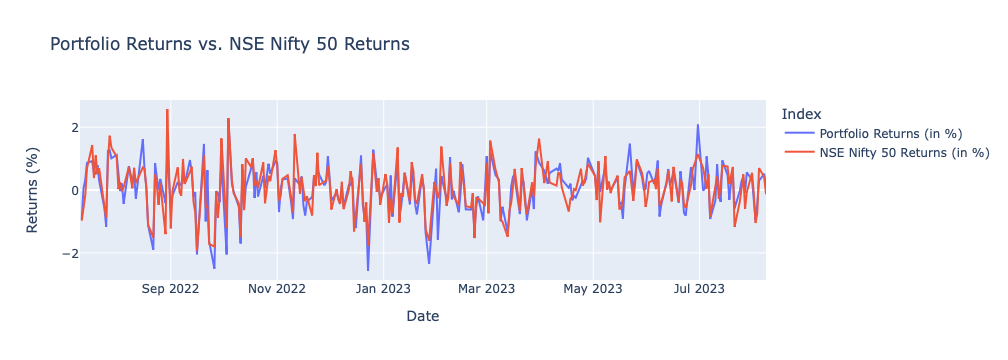

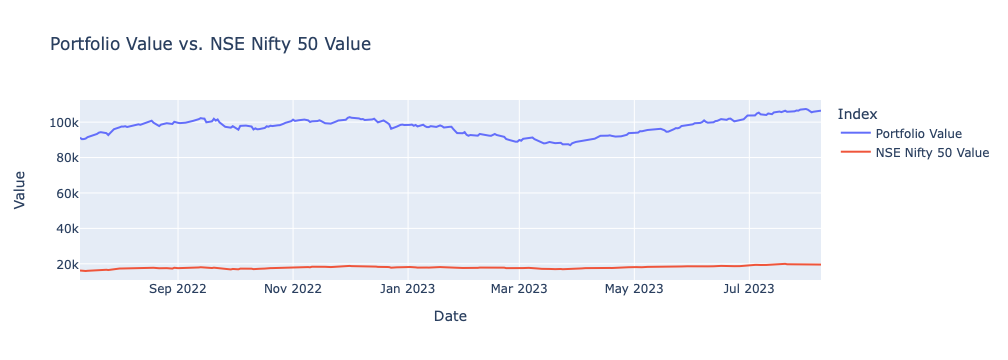

In [79]:
# Create a new dataframe for visualization (returns)
visualization_data_returns = pd.DataFrame({
    "Date": data.index,
    "Portfolio Returns (in %)": data["portfolio"].pct_change() * 100,
    "NSE Nifty 50 Returns (in %)": data[market_symbol].pct_change() * 100
})



# Create a new dataframe for visualization (returns)
visualization_data_returns = pd.DataFrame({
    "Date": data.index,
    "Portfolio Returns (in %)": data["portfolio"].pct_change() * 100,
    "NSE Nifty 50 Returns (in %)": data[market_symbol].pct_change() * 100
})

# Plot using Plotly for interactivity (returns)
fig_returns = px.line(visualization_data_returns, x="Date", y=["Portfolio Returns (in %)", "NSE Nifty 50 Returns (in %)"],
                      labels={"value": "Returns (%)", "variable": "Index"},
                      title="Portfolio Returns vs. NSE Nifty 50 Returns")
fig_returns.show()

# Create a new dataframe for visualization (values)
visualization_data_values = pd.DataFrame({
    "Date": data.index,
    "Portfolio Value": data["portfolio"],
    "NSE Nifty 50 Value": data[market_symbol]
})

# Plot using Plotly for interactivity (values)
fig_values = px.line(visualization_data_values, x="Date", y=["Portfolio Value", "NSE Nifty 50 Value"],
                     labels={"value": "Value", "variable": "Index"},
                     title="Portfolio Value vs. NSE Nifty 50 Value")
fig_values.show()

In [62]:
adj_betas[:3]

[0.47396551414480775, -0.6424439884581775, 0.7266730273484378]

In [66]:
weight=np.array([1,1,2])
weight.T @ adj_betas[:3]

1.2848675803835057